In [124]:
from commonFunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


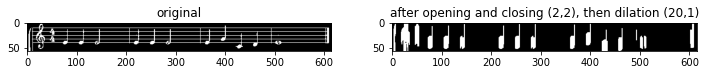

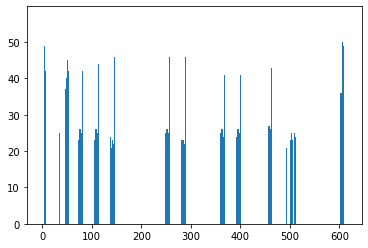

In [202]:
# load line & template as gray images and binarize them
img = (cv.imread("imgs/line.png",0)).astype(np.uint8)
template = (cv.imread("imgs/template.png",0)).astype(np.uint8)
img = (img <= threshold_otsu(img)).astype(np.uint8)
img = img.astype(np.uint8)
template = (template <= threshold_otsu(template)).astype(np.uint8)
original = img.copy()
# show_images([img,template],["binarized line","binarized template"])
# print(img.shape,template.shape)

kernal = np.ones((2,2)).astype(np.uint8)
img = opening(img,kernal)
img = closing(img,kernal)
kernal = np.ones((20,1)).astype(np.uint8)
img = binary_dilation(img,kernal).astype(np.uint8)
show_images([original,img],["original","after opening and closing (2,2), then dilation (20,1)"])

# perform vertical-histogram-projection and display it
his = cv.reduce(img,0,cv.REDUCE_SUM,dtype=cv.CV_32S)[0]
plt.bar(np.arange(len(his)),his)
plt.show()